# Setup

## Imports

In [21]:
import numpy as np
import pandas as pd
import os

from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

## Paths

In [23]:
# where the data files live...
# can also use relative path (this is an "absolute" path)
path_processed_data = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/'

# Tower of Hanoi

## Load Data

In [24]:
# read csv
df_hanoi = pd.read_csv(path_processed_data + 'run1_tasks.csv')
df_hanoi.head(2)

,ParticipantIdentifier,trial_date,task_motivation_time,task_motivation_level,task_gng_time,task_gng_incorrectNoGo,task_gng_incorrectGo,task_gng_correctGo,task_gng_correctNoGo,task_gng_avgRt,...,task_stroop_totalAvgRT,task_stroop_congruentAvgRT,task_stroop_incongruentAvgRT,task_psat_accuracy,task_psat_avgRT,task_hanoi_solved,task_hanoi_time,task_hanoi_moves,task_spatialSpan_score,task_spatialSpan_time
0,6b827de8-fe47-4007-aad3-202655b954e3,2022-10-24,07:09:39,6,07:20:42,3.0,2.0,38.0,7.0,450.674419,...,0.791628,0.732122,0.840315,0.866667,1.649477,True,58.440441,44.0,380.0,07:17:07
1,a33e1d38-6ee8-4da6-993b-a94a8ae7fc30,2022-10-24,08:01:46,8,09:02:28,8.0,0.0,40.0,2.0,310.125000,...,0.941749,0.792281,1.064041,0.766667,1.920177,True,26.781238,34.0,195.0,08:54:21


In [25]:
hanoi_cols = [col for col in df_hanoi.columns if 'hanoi' in col]

In [4]:
# take only columns that contain hanoi
hanoi_cols = [col for col in df_hanoi.columns if 'hanoi' in col]
df_hanoi = df_hanoi[['ParticipantIdentifier', 'trial_date'] + hanoi_cols]
df_hanoi.head(12)

,ParticipantIdentifier,trial_date,task_hanoi_solved,task_hanoi_time,task_hanoi_moves
0,6b827de8-fe47-4007-aad3-202655b954e3,2022-10-24,True,58.440441,44.0
1,a33e1d38-6ee8-4da6-993b-a94a8ae7fc30,2022-10-24,True,26.781238,34.0
2,c2097f36-4ca3-4537-856d-a649d1557553,2022-10-24,True,40.018429,69.0
3,bf670311-c590-473a-98ab-d719ebf0f2ab,2022-10-24,False,33.449983,36.0
4,f889f1a4-9754-456e-ae08-092f992d3359,2022-10-24,True,78.185885,49.0
5,7d501571-5d23-4f09-9266-1644f4f71add,2022-10-24,NaN,NaN,NaN
6,a9de00be-460d-4b74-bed3-bf013fe2052a,2022-10-24,True,46.846759,44.0
7,1e7aef96-16cc-43f8-95d4-e3bc582eb6d3,2022-10-24,True,27.864147,33.0
8,bfc23509-915e-4c0a-bbad-8ed6fe3df8f1,2022-10-24,True,23.142789,35.0
9,0ca43379-41b5-47fb-90ba-0a22e6bf5586,2022-10-24,True,49.340039,57.0


In [5]:
# rows and cols
df_hanoi.shape

(4276, 5)

In [6]:
# for ease of typing...can rerun if we lose this variable
df = df_hanoi.copy()

## Features/Variables Overview

Run [pandas profiler](https://pandas-profiling.ydata.ai/docs/master/index.html) to get summary of features.

Shows us that we have some weird duplicates happening...

In [7]:
profile = ProfileReport(df.drop(['trial_date', 'ParticipantIdentifier'], axis=1),
                        title="ToH Measure",
                       )
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Clean Data

### Drop Duplicates

In [9]:
df.shape

(4276, 5)

In [10]:
df = df.drop_duplicates().reset_index(drop = True)

In [11]:
df.shape

(4276, 5)

### Remove NA Values

In [12]:
df.isna().sum().sum()

2133

In [13]:
df = df.dropna()

In [14]:
df.isna().sum().sum()

0

## Data Viz

In [15]:
x = df.set_index('trial_date')

In [16]:
# take 10 random people
subs = np.random.choice(np.unique(x.ParticipantIdentifier), 10)

In [17]:
x = x[x['ParticipantIdentifier'].isin(subs)]

In [18]:
x = x.sort_index()

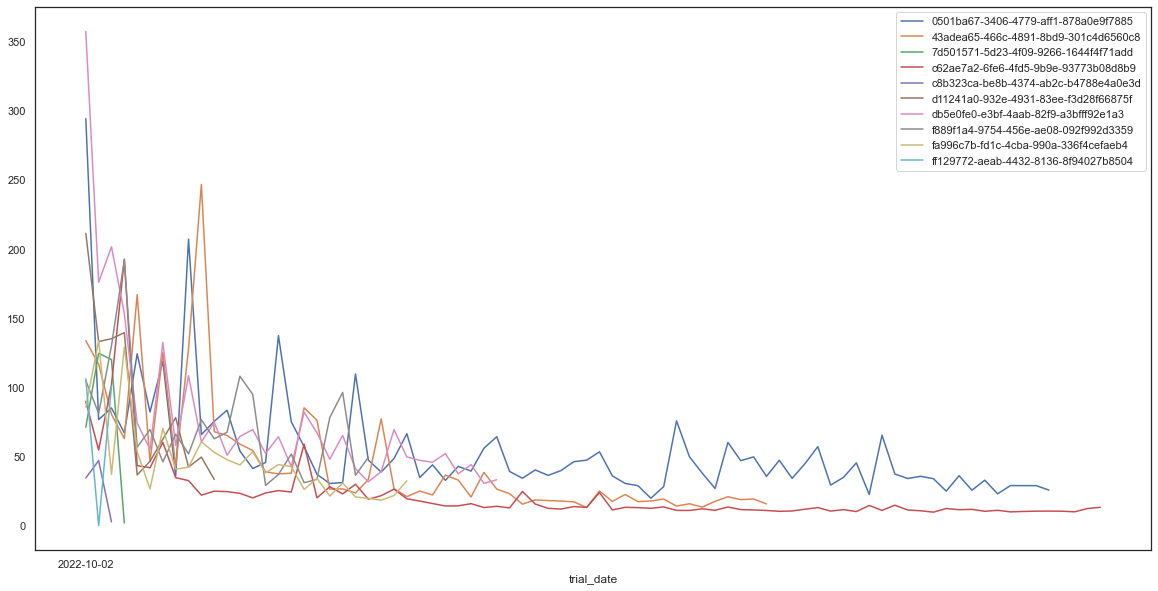

In [19]:
x.groupby('ParticipantIdentifier')['task_hanoi_time'].plot(legend=True, figsize=(20, 10));

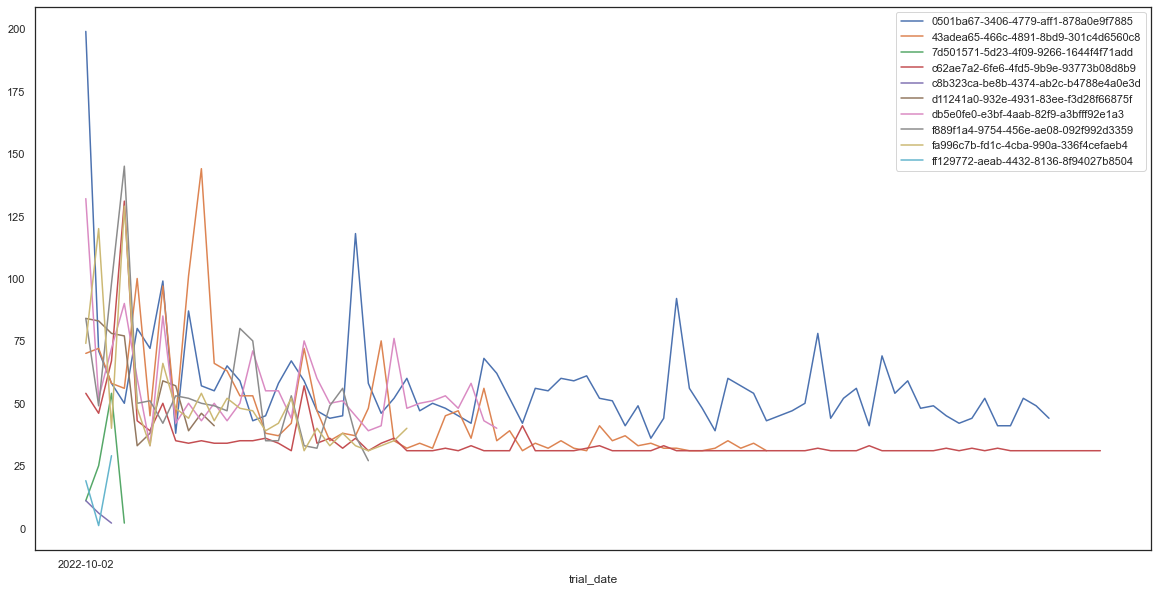

In [20]:
x.groupby('ParticipantIdentifier')['task_hanoi_moves'].plot(legend=True, figsize=(20, 10));

In [30]:
df.shape

(3565, 5)

In [ ]:
grades ~ avg.moves + variance + learningRate + ravens + selfControl

In [109]:
# what about people who did not miss days?

# Raven's Matrices

## Load Data

In [3]:
# read csv
df_ravens = pd.read_csv(path_processed_data + 'run1_affect.csv')

In [4]:
# rows and cols
df_ravens.shape

(2736, 42)

In [7]:
# for ease of typing...can rerun if we lose this variable
df = df_affect.copy()

## Features/Variables

Run [pandas profiler](https://pandas-profiling.ydata.ai/docs/master/index.html) to get summary of features.

In [ ]:
profile = ProfileReport(df.drop(['trial_date', 'ParticipantIdentifier'], axis=1),
                        title="BIGApp Affect Measures",
                        dataset = {
                            'description': 'The evening affect measures captured from run 1 of the BIGApp project',
                            'author': 'Daniel J Wilson',
                            'url': 'https://danieljwilson.com/studies/ib/data/'
                        }
                       )
profile.to_file(path_processed_data + 'run1_affect.html')
profile.to_notebook_iframe()

# Grade Data

The focus is the end of semester grade data in each class (and overall GPA)

We also have other grade data:
- self report of high school grades
- self report of SAT (if they took it)
- predicted grades for this semester

## Load Data

In [3]:
# read csv
    

In [4]:
# rows and cols


(2736, 42)

In [7]:
# for ease of typing...can rerun if we lose this variable
df = .copy()

## Features/Variables

Run [pandas profiler](https://pandas-profiling.ydata.ai/docs/master/index.html) to get summary of features.

In [ ]:
profile = ProfileReport(df.drop(['trial_date', 'ParticipantIdentifier'], axis=1),
                        title="BIGApp Affect Measures",
                        dataset = {
                            'description': 'The evening affect measures captured from run 1 of the BIGApp project',
                            'author': 'Daniel J Wilson',
                            'url': 'https://danieljwilson.com/studies/ib/data/'
                        }
                       )
profile.to_file(path_processed_data + 'run1_affect.html')
profile.to_notebook_iframe()